In [9]:
import numpy as np
import pylab as plt
import ot

In [11]:
## Import your image here by replacing inside the ''. Make sure That all the images are of the same size

f1 = 1 - pl.imread('/Users/Mehdi/Desktop/Screenshot 2021-08-30 at 12.38.03.png')[:, :, 2]
f2 = 1 - pl.imread('/Users/Mehdi/Desktop/Screenshot 2021-08-30 at 12.38.11.png')[:, :, 2]
f3 = 1 - pl.imread('/Users/Mehdi/Desktop/Screenshot 2021-08-30 at 12.38.17.png')[:, :, 2]
f4 = 1 - pl.imread('/Users/Mehdi/Desktop/Screenshot 2021-08-30 at 12.38.21.png')[:, :, 2]

In [12]:
nb_images = 5
grid_x = grid_y = np.linspace(start = 0, stop = 1, num = nb_images)

## coordinates for the linear interpolation

c00 = np.array((1, 0, 0, 0)) 
c10 = np.array((0, 1, 0, 0))
c01 = np.array((0, 0, 1, 0))
c11 = np.array((0, 0, 0, 1))

In [13]:
A = []
f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)

A.append(f1)
A.append(f2)
A.append(f3)
A.append(f4)

A = np.array(A)

reg = 0.004
cm = 'Greys' ## Change the color for the output image here

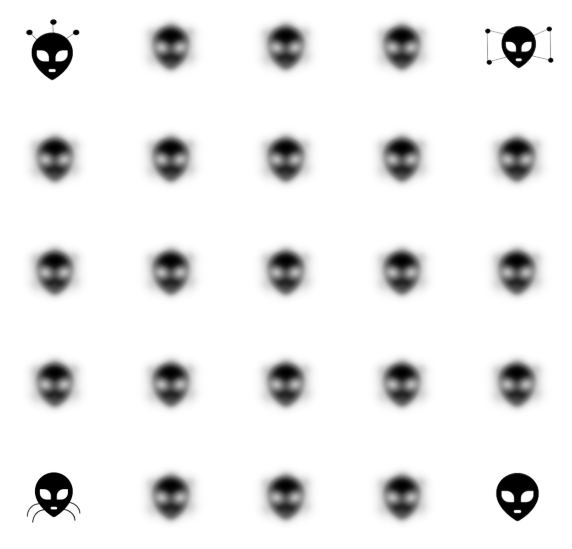

In [17]:
pl.figure(figsize=(10, 10)) ## Change the size of the output image

for i in range(nb_images):
    for j in range(nb_images):
        
        plt.subplot(nb_images, nb_images, i * nb_images + j + 1)
        
        c0 = c00*(1 - grid_x[i]) + c10*grid_x[i]
        c1 = c01*(1 - grid_x[i]) + c11*grid_x[i]
        c = c0*(1 - grid_y[j]) + c1*grid_y[j]
        
        if i == 0 and j == 0:
            pl.imshow(f1, cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(f3, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(f2, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(f4, cmap=cm)
            pl.axis('off')
        else:
            pl.imshow(ot.bregman.convolutional_barycenter2d(A, reg, weights), cmap=cm)
            pl.axis('off')
            